In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os

os.path.isfile("C:/Users/Tru Projects/Desktop/Surya Projects/heart attack analysis/heart.csv")

True

In [2]:
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1    165
0    138
Name: output, dtype: int64 




<AxesSubplot:>

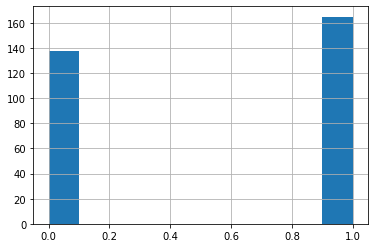

In [3]:
print(data.output.value_counts(),"\n\n")
data['output'].hist()

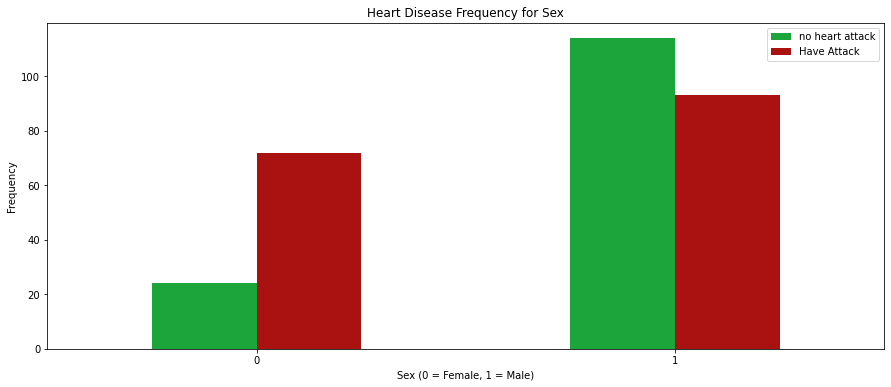

In [4]:
pd.crosstab(data.sex,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["no heart attack", "Have Attack"])
plt.ylabel('Frequency')
plt.show()


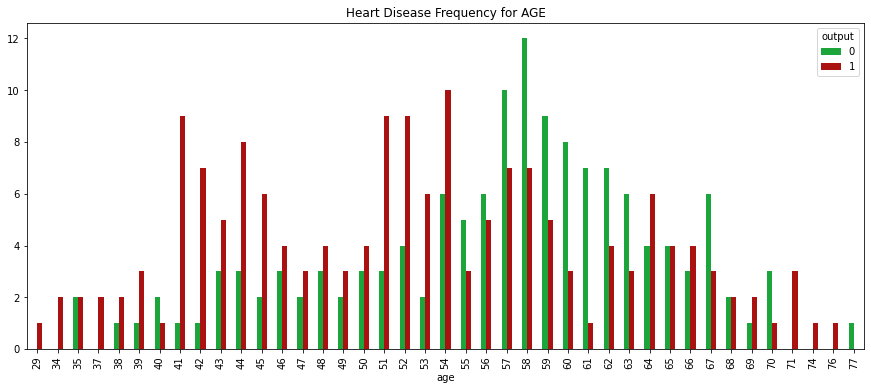

In [5]:
pd.crosstab(data.age,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for AGE')
plt.show()

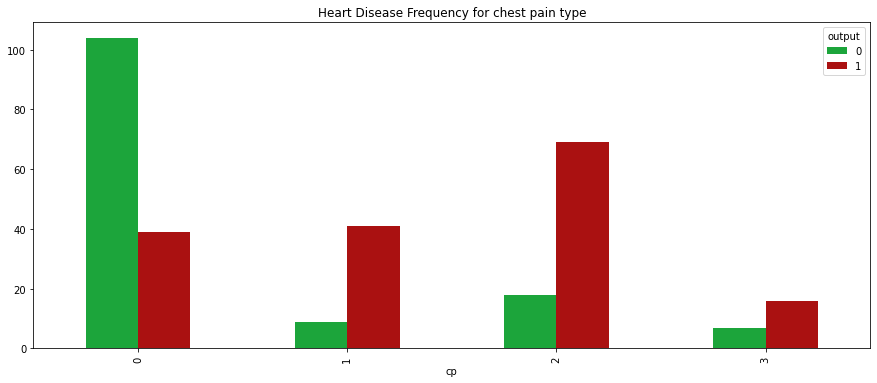

In [6]:
pd.crosstab(data.cp,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for chest pain type')
plt.show()

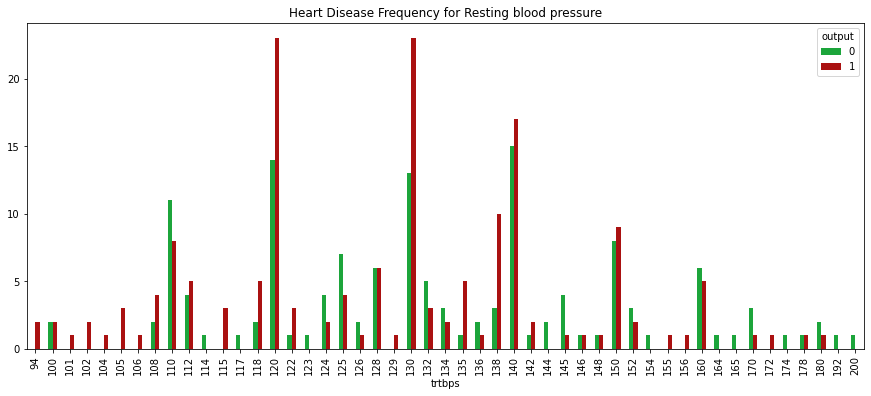

In [7]:
pd.crosstab(data.trtbps,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Resting blood pressure')
plt.show()

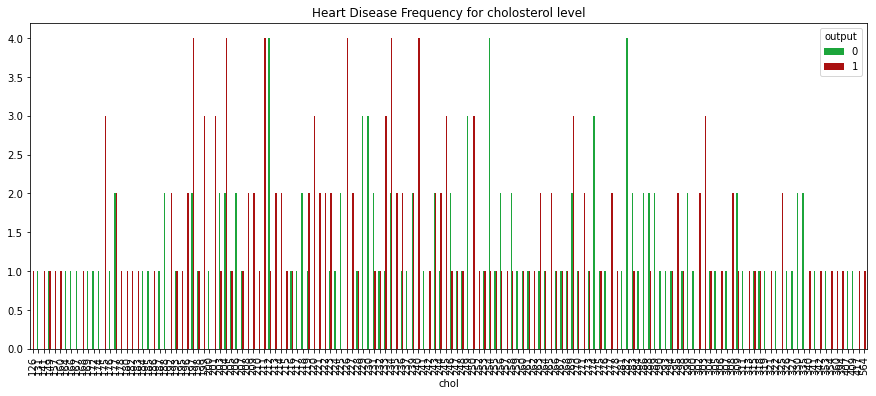

In [8]:
pd.crosstab(data.chol,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for cholosterol level')
plt.show()

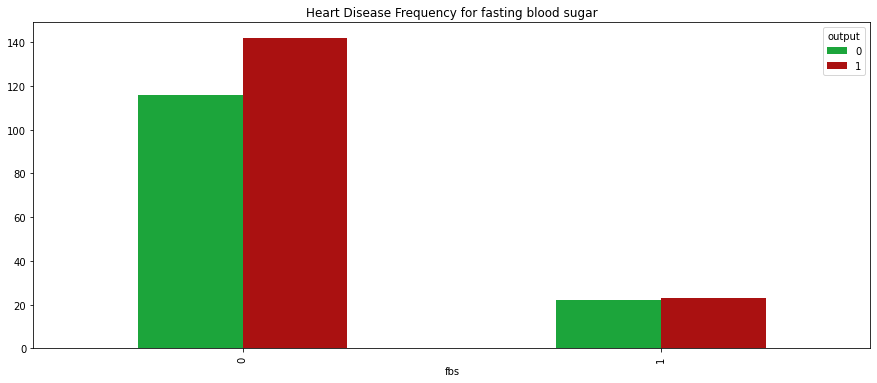

In [9]:
pd.crosstab(data.fbs,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for fasting blood sugar')
plt.show()

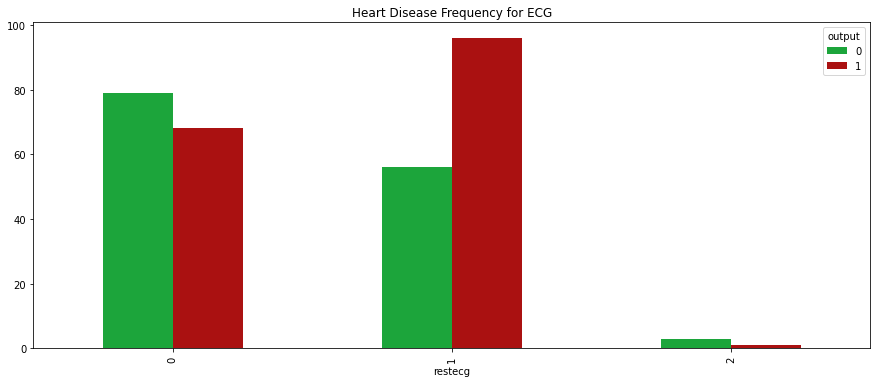

In [10]:
pd.crosstab(data.restecg,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for ECG')
plt.show()

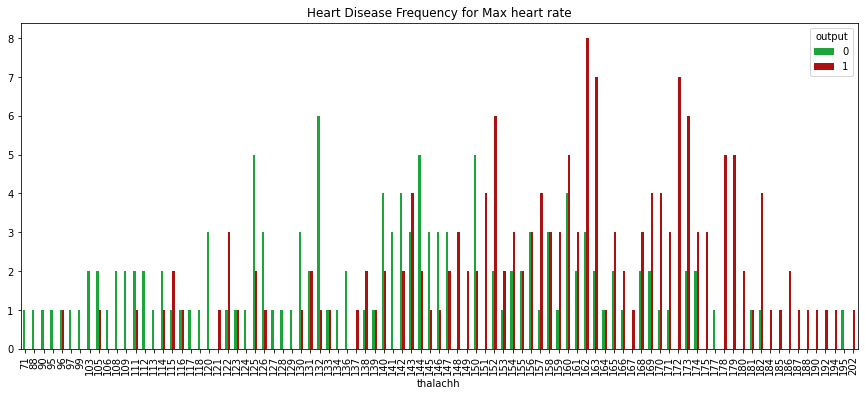

In [11]:
pd.crosstab(data.thalachh,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Max heart rate')
plt.show()

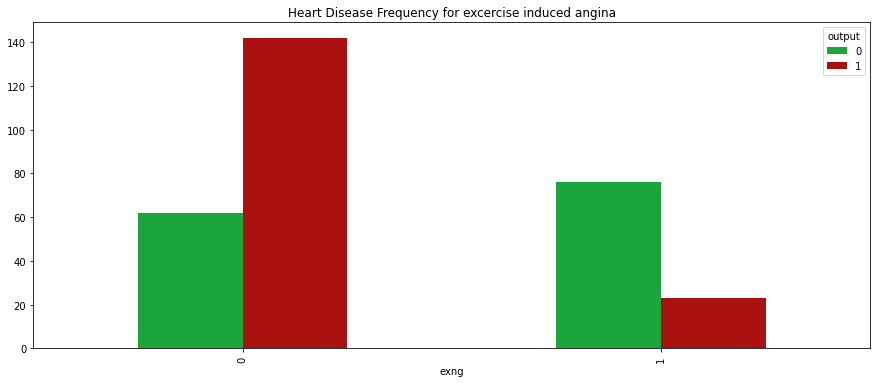

In [12]:
pd.crosstab(data.exng,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for excercise induced angina')
plt.show()

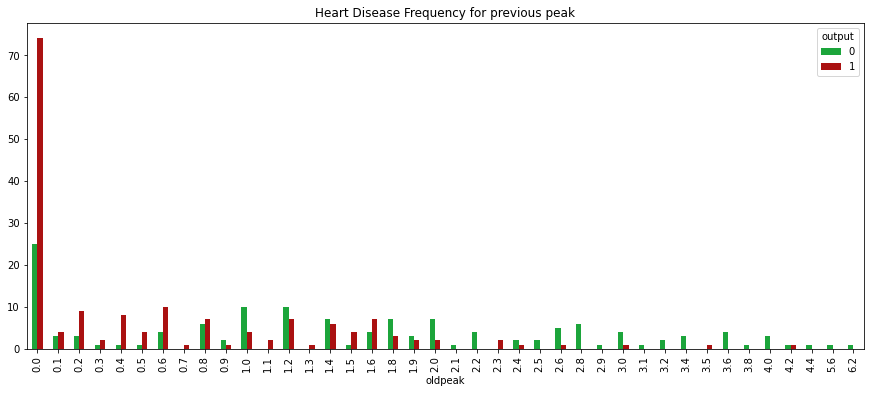

In [13]:
pd.crosstab(data.oldpeak,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for previous peak')
plt.show()

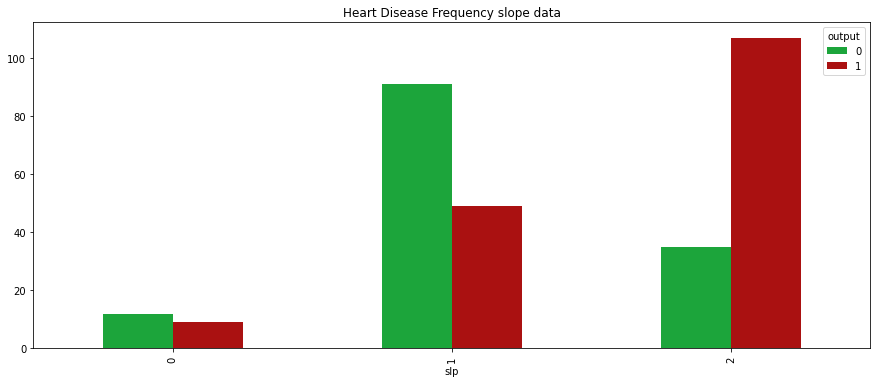

In [14]:
pd.crosstab(data.slp,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency slope data')
plt.show()

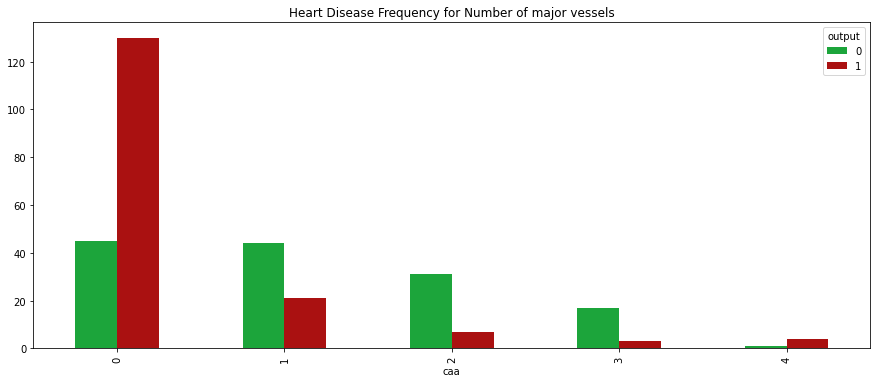

In [15]:
pd.crosstab(data.caa,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Number of major vessels')
plt.show()

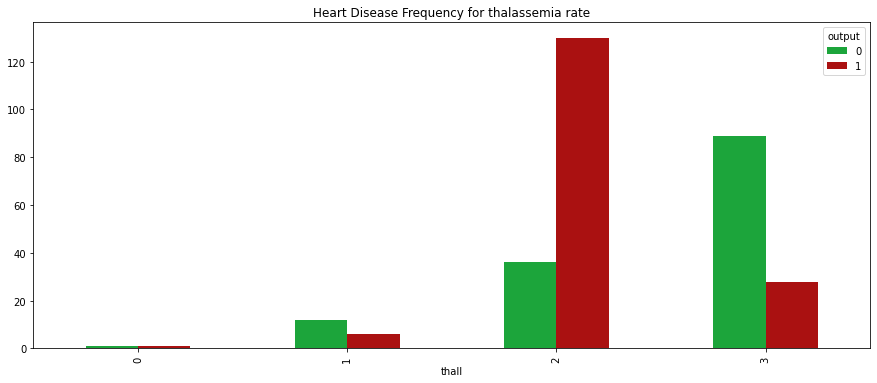

In [16]:
pd.crosstab(data.thall,data.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for thalassemia rate')
plt.show()

In [17]:
T = data.output.values
P=data.drop(['output'], axis = 1)
from sklearn.model_selection import train_test_split
P_train, P_test, T_train, T_test = train_test_split(P,T,test_size = 0.2,random_state=0)


In [18]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(P_train)
P_strain = scaler.transform(P_train)
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
P_strain=pca.fit_transform(P_strain)
P_stest=pca.fit_transform(P_test)
print("No of samples in training:",len(P_strain))
print("\nNo of samples in tesing: ",len(P_stest))

No of samples in training: 242

No of samples in tesing:  61


In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(P_strain, T_train)




LogisticRegression()

In [20]:
pred=logreg.predict(P_stest)
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report as cl
from sklearn.metrics import confusion_matrix as cm
lracc=acc(pred,T_test)*100
print("accuracy score is:\n",acc(pred,T_test)*100)
print("\n\n classification report is :\n",cl(pred,T_test))
print("\n\n confusion matrix is:\n",cm(pred,T_test))

accuracy score is:
 63.934426229508205


 classification report is :
               precision    recall  f1-score   support

           0       0.67      0.58      0.62        31
           1       0.62      0.70      0.66        30

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



 confusion matrix is:
 [[18 13]
 [ 9 21]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(P_strain, T_train)


KNeighborsClassifier(metric='euclidean')

In [22]:
pred=knn.predict(P_stest)
knnacc=acc(pred,T_test)*100
print("accuracy score is:\n",acc(pred,T_test)*100)
print("\n\n classification report is :\n",cl(pred,T_test))
print("\n\n confusion matrix is:\n",cm(pred,T_test))

accuracy score is:
 62.295081967213115


 classification report is :
               precision    recall  f1-score   support

           0       0.56      0.58      0.57        26
           1       0.68      0.66      0.67        35

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.62      0.62      0.62        61



 confusion matrix is:
 [[15 11]
 [12 23]]


In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(P_strain, T_train)

GaussianNB()

In [24]:
pred=nb.predict(P_stest)
gnbacc=acc(pred,T_test)*100
print("accuracy score is:\n",acc(pred,T_test)*100)
print("\n\n classification report is :\n",cl(pred,T_test))
print("\n\n confusion matrix is:\n",cm(pred,T_test))

accuracy score is:
 49.18032786885246


 classification report is :
               precision    recall  f1-score   support

           0       0.70      0.45      0.55        42
           1       0.32      0.58      0.42        19

    accuracy                           0.49        61
   macro avg       0.51      0.52      0.48        61
weighted avg       0.59      0.49      0.51        61



 confusion matrix is:
 [[19 23]
 [ 8 11]]


In [25]:
from sklearn import svm
sv=svm.SVC()
sv.fit(P_strain,T_train)

SVC()

In [26]:
pred=sv.predict(P_stest)
svcacc=acc(pred,T_test)*100
print("accuracy score is:\n",acc(pred,T_test)*100)
print("\n\n classification report is :\n",cl(pred,T_test))
print("\n\n confusion matrix is:\n",cm(pred,T_test))

accuracy score is:
 44.26229508196721


 classification report is :
               precision    recall  f1-score   support

           0       1.00      0.44      0.61        61
           1       0.00      0.00      0.00         0

    accuracy                           0.44        61
   macro avg       0.50      0.22      0.31        61
weighted avg       1.00      0.44      0.61        61



 confusion matrix is:
 [[27 34]
 [ 0  0]]


C:\Users\Tru Projects\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tru Projects\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tru Projects\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(P_strain,T_train)

DecisionTreeClassifier()

In [28]:
pred=dt.predict(P_stest)
dtacc=acc(pred,T_test)*100
print("accuracy score is:\n",acc(pred,T_test)*100)
print("\n\n classification report is :\n",cl(pred,T_test))
print("\n\n confusion matrix is:\n",cm(pred,T_test))

accuracy score is:
 55.73770491803278


 classification report is :
               precision    recall  f1-score   support

           0       0.59      0.50      0.54        32
           1       0.53      0.62      0.57        29

    accuracy                           0.56        61
   macro avg       0.56      0.56      0.56        61
weighted avg       0.56      0.56      0.56        61



 confusion matrix is:
 [[16 16]
 [11 18]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100) 
rfc.fit(P_strain,T_train)



RandomForestClassifier()

In [30]:
pred=rfc.predict(P_stest)
rfcacc=acc(pred,T_test)*100
print("accuracy score is:\n",acc(pred,T_test)*100)
print("\n\n classification report is :\n",cl(pred,T_test))
print("\n\n confusion matrix is:\n",cm(pred,T_test))

accuracy score is:
 60.65573770491803


 classification report is :
               precision    recall  f1-score   support

           0       0.67      0.55      0.60        33
           1       0.56      0.68      0.61        28

    accuracy                           0.61        61
   macro avg       0.61      0.61      0.61        61
weighted avg       0.62      0.61      0.61        61



 confusion matrix is:
 [[18 15]
 [ 9 19]]


Text(0, 0.5, 'Accuracy %')

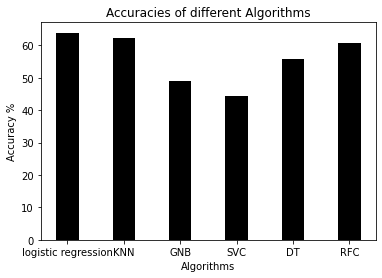

In [31]:
accuracies={"logistic regression":lracc,"KNN":knnacc,"GNB":gnbacc,"SVC":svcacc,"DT":dtacc,"RFC":rfcacc}
plt.bar(list(accuracies.keys()),list(accuracies.values()), color ='black',
        width = 0.4)
plt.title("Accuracies of different Algorithms")

plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")



In [32]:
k=list(accuracies.keys())
kk=list(accuracies.values())
print("The algorithm with highest accuracy is :",k[kk.index(max(kk))],"\nthecuracy is:",max(kk))

The algorithm with highest accuracy is : logistic regression 
thecuracy is: 63.934426229508205
